In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

Matplotlib is building the font cache; this may take a moment.


In [2]:
try:
    iris = load_iris()
    data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    data['species'] = iris.target
    species_map = dict(zip(range(3), iris.target_names))
    data['species'] = data['species'].map(species_map)
    print("Dataset loaded successfully.\n")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully.



In [3]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [4]:
# Data structure
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [6]:
# Clean the dataset (not necessary for Iris, but included as example)
data = data.dropna()


In [7]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [8]:
# Group by species and compute mean
print("\nMean values by species:")
print(data.groupby('species').mean())


Mean values by species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


In [9]:
# Observations
print("\nObservations:")
print("1. Setosa has significantly shorter petal lengths than the other species.")
print("2. Versicolor and Virginica have similar sepal lengths but different petal widths.")


Observations:
1. Setosa has significantly shorter petal lengths than the other species.
2. Versicolor and Virginica have similar sepal lengths but different petal widths.


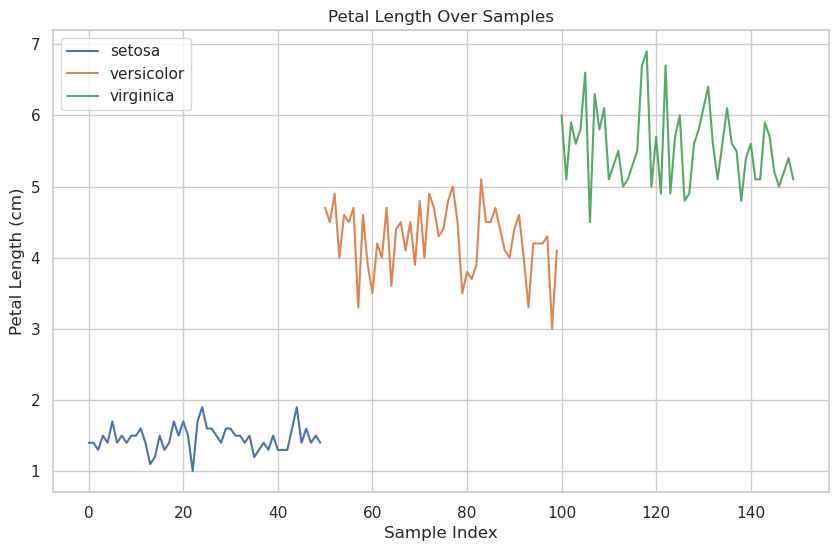

In [10]:
# Set seaborn style
sns.set(style="whitegrid")

# 1. Line chart (example: petal length trend by index for each species)
plt.figure(figsize=(10,6))
for species in data['species'].unique():
    subset = data[data['species'] == species]
    plt.plot(subset.index, subset['petal length (cm)'], label=species)
plt.title('Petal Length Over Samples')
plt.xlabel('Sample Index')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()

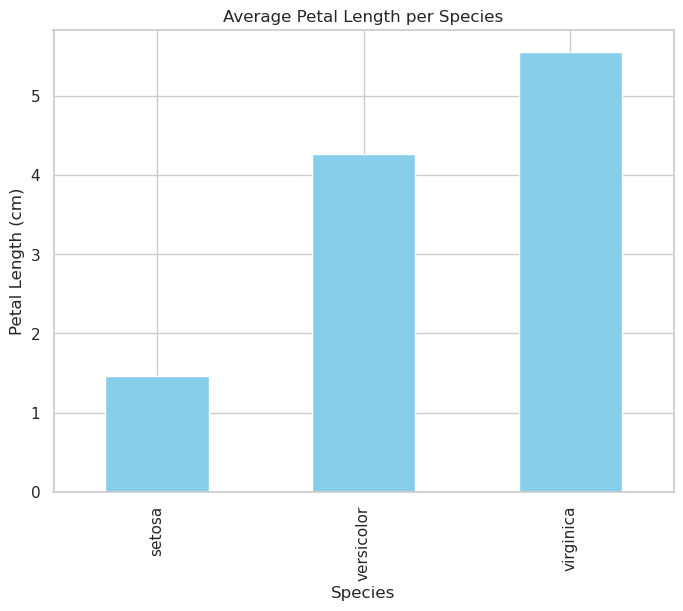

In [11]:
# 2. Bar chart: average petal length per species
plt.figure(figsize=(8,6))
avg_petal = data.groupby('species')['petal length (cm)'].mean()
avg_petal.plot(kind='bar', color='skyblue')
plt.title('Average Petal Length per Species')
plt.ylabel('Petal Length (cm)')
plt.xlabel('Species')
plt.show()

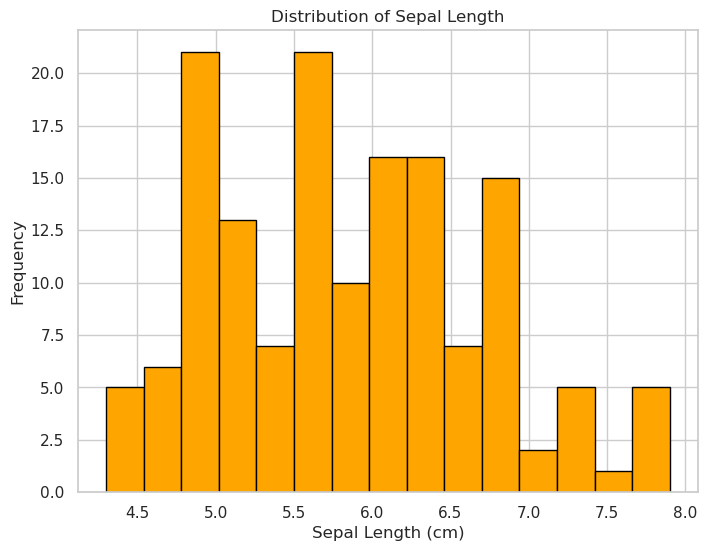

In [12]:
# 3. Histogram: distribution of sepal length
plt.figure(figsize=(8,6))
plt.hist(data['sepal length (cm)'], bins=15, color='orange', edgecolor='black')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

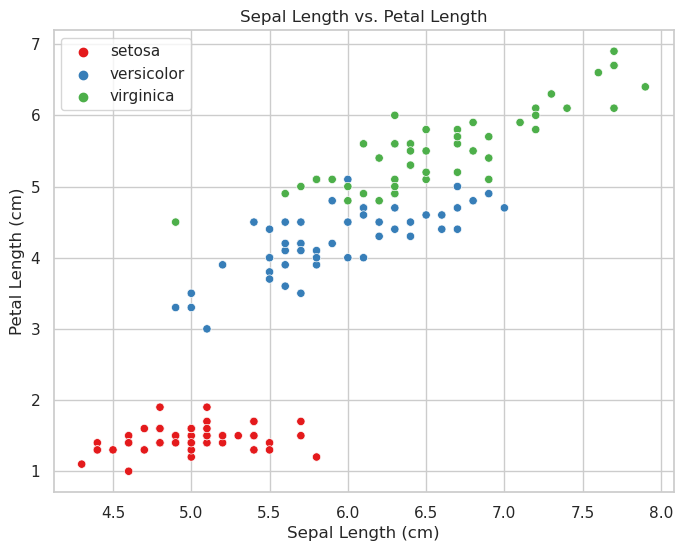

In [13]:
# 4. Scatter plot: sepal length vs petal length
plt.figure(figsize=(8,6))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=data, palette='Set1')
plt.title('Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()